In [1]:
# 📘 Notebook: Simple Linear Regression for Delivery Delay Prediction

# ===== Cell 1: Import Required Libraries =====
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ===== Cell 2: Load CSV Files =====
data_dir = "/Users/xingwei/Desktop/549/data"  # or your absolute path

orders = pd.read_csv(f"{data_dir}/olist_orders_dataset.csv", parse_dates=[
    'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
items = pd.read_csv(f"{data_dir}/olist_order_items_dataset.csv")
products = pd.read_csv(f"{data_dir}/olist_products_dataset.csv")
payments = pd.read_csv(f"{data_dir}/olist_order_payments_dataset.csv")
reviews = pd.read_csv(f"{data_dir}/olist_order_reviews_dataset.csv")

# ===== Cell 3: Preprocess Order Data =====
orders = orders.dropna(subset=[
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'order_purchase_timestamp'
])
orders['delay_days'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days
orders['delay_days'] = orders['delay_days'].apply(lambda x: x if x > 0 and x <= 30 else 0)
orders['shipping_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# ===== Cell 4: Merge Datasets =====
order_full = orders.merge(items, on='order_id', how='left')
order_full = order_full.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
order_full = order_full.merge(payments[['order_id', 'payment_value']], on='order_id', how='left')
order_full = order_full.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')

# ===== Cell 5: Define Features and Prepare Data =====
features = ['shipping_days', 'freight_value', 'price', 'payment_value']
order_full = order_full.dropna(subset=features + ['delay_days'])
X = order_full[features]
y = order_full['delay_days']

# ===== Cell 6: Train/Test Split and Linear Regression =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ===== Cell 7: Evaluation Metrics =====
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R^2 Score: {r2:.2f}")

# ===== Cell 8: Show Coefficients =====
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coeff_df)


Linear Regression RMSE: 2.27
Linear Regression R^2 Score: 0.25
         Feature  Coefficient
0  shipping_days     0.152996
1  freight_value    -0.013434
2          price     0.000496
3  payment_value    -0.000198


Linear Regression RMSE: 2.27
Linear Regression R^2 Score: 0.25

Model Coefficients:

         Feature  Coefficient
0  shipping_days     0.152996
1  freight_value    -0.013434
2          price     0.000496
3  payment_value    -0.000198


/var/folders/pl/2h31dnhx49s3vqnb89w_bk580000gn/T/ipykernel_36584/1247402870.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette='coolwarm')


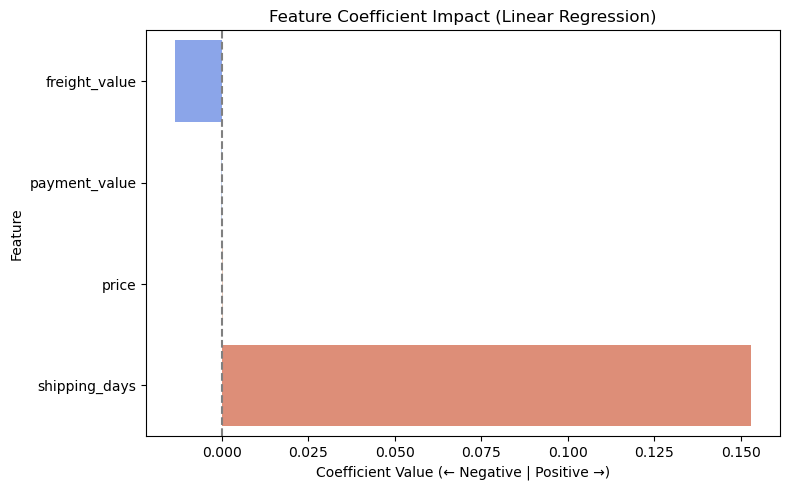

In [3]:
# 📘 Notebook: Simple Linear Regression for Delivery Delay Prediction

# ===== Cell 1: Import Required Libraries =====
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Cell 2: Load CSV Files =====
data_dir = "/Users/xingwei/Desktop/549/data"

orders = pd.read_csv(f"{data_dir}/olist_orders_dataset.csv", parse_dates=[
    'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
items = pd.read_csv(f"{data_dir}/olist_order_items_dataset.csv")
products = pd.read_csv(f"{data_dir}/olist_products_dataset.csv")
payments = pd.read_csv(f"{data_dir}/olist_order_payments_dataset.csv")
reviews = pd.read_csv(f"{data_dir}/olist_order_reviews_dataset.csv")

# ===== Cell 3: Preprocess Order Data =====
orders = orders.dropna(subset=[
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'order_purchase_timestamp'
])
orders['delay_days'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days
orders['delay_days'] = orders['delay_days'].apply(lambda x: x if x > 0 and x <= 30 else 0)
orders['shipping_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# ===== Cell 4: Merge Datasets =====
order_full = orders.merge(items, on='order_id', how='left')
order_full = order_full.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
order_full = order_full.merge(payments[['order_id', 'payment_value']], on='order_id', how='left')
order_full = order_full.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')

# ===== Cell 5: Define Features and Prepare Data =====
features = ['shipping_days', 'freight_value', 'price', 'payment_value']
order_full = order_full.dropna(subset=features + ['delay_days'])
X = order_full[features]
y = order_full['delay_days']

# ===== Cell 6: Train/Test Split and Linear Regression =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ===== Cell 7: Evaluation Metrics =====
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R^2 Score: {r2:.2f}")

# ===== Cell 8: Show Coefficients =====
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:\n")
print(coeff_df)

# ===== Cell 9: Plot Feature Coefficients =====
coeff_df = coeff_df.sort_values(by='Coefficient')
plt.figure(figsize=(8, 5))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Feature Coefficient Impact (Linear Regression)')
plt.xlabel('Coefficient Value (← Negative | Positive →)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()